<a href="https://colab.research.google.com/github/Deepeck05/Machine_Learning_Project/blob/main/LR_Housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Linear Regression Housing Price Prediction***


# ***Importing the Libraries***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('Housing.csv')

# ***Copying the DataFrame***

In [ ]:
housing_price=df.copy()


# ***Data Cleaning & Understanding***

In [ ]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
housing_price.shape

(545, 13)

In [ ]:
housing_price.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# ***Encoding the Object Datatype Columns***

In [ ]:
label_encoder = LabelEncoder()
group=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
        'airconditioning', 'prefarea', 'furnishingstatus']
for i in group:
  housing_price[i] = label_encoder.fit_transform(housing_price[i])

# ***Scaling the Columns***

In [ ]:
scaler = StandardScaler()
columns_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price',
                    'mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
housing_price[columns_to_scale] = scaler.fit_transform(housing_price[columns_to_scale])

# ***Testing the Linearity***

<Axes: ylabel='Frequency'>

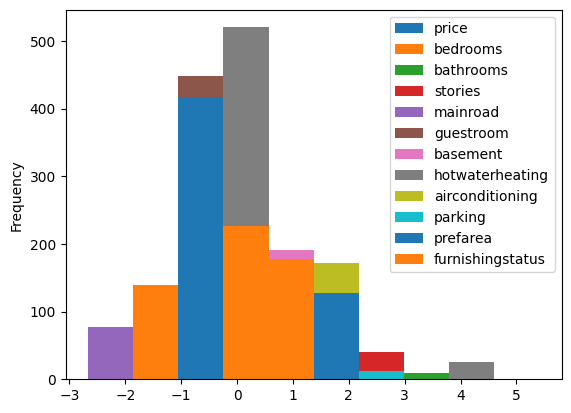

In [ ]:
housing_price.plot(kind='hist',x='area')

<Axes: xlabel='area', ylabel='price'>

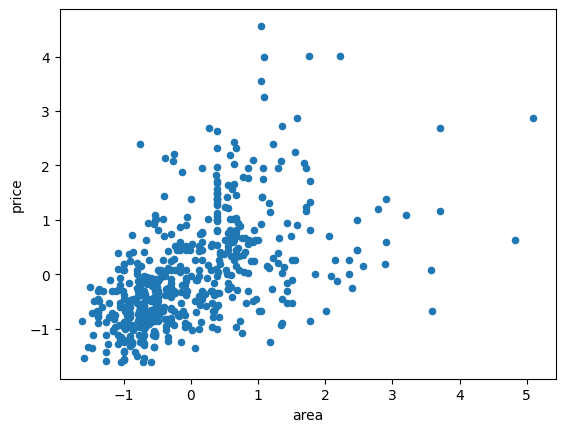

In [ ]:
housing_price.plot(kind='scatter',x='area',y='price')

# ***Testing the Multicollinearity***

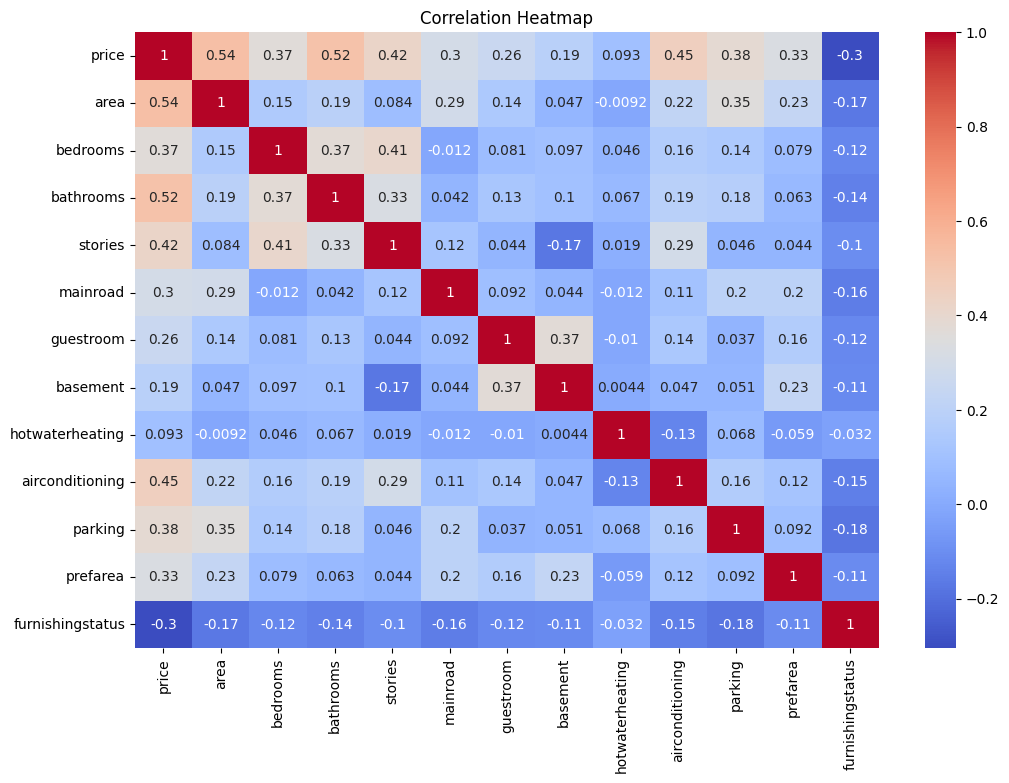

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_price.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ***Model Building***

# *1.Feature Selection*




In [ ]:
x=housing_price.drop('price',axis=1)
y=housing_price['price']

# *2.Train Split Function*

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# ***Model Training***

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('model training completed')

model training completed


# ***Model Evaluation***

# ***1.Prediction***

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 2.33829466e-01,  1.33260788e+00, -9.11799559e-01, -1.10844471e-01,
       -7.67260356e-01, -6.44102245e-01,  4.70234029e-01,  8.81484614e-01,
       -1.07608130e+00, -1.12257985e+00,  2.57067072e+00, -1.03776639e+00,
       -8.40704125e-01, -7.56915489e-01, -5.63406050e-01,  2.85948771e-01,
       -9.51884867e-01,  2.35832585e-02, -2.05326085e-01, -6.64430829e-01,
        5.50927209e-01,  5.74334213e-01, -1.07373582e+00, -2.21493441e-03,
        2.34398855e-01,  1.47095836e+00, -8.09134204e-01,  2.51206442e-01,
        1.82573567e+00, -7.13087608e-01,  8.97507279e-01, -7.60264951e-01,
        1.05719022e+00, -3.27385312e-01, -6.30150579e-01,  5.46574731e-01,
        8.78104452e-04, -2.00696005e-01, -8.28947011e-01, -6.87810019e-02,
       -1.30874930e-01, -6.55766156e-01,  1.32251120e+00, -3.98782284e-01,
       -5.69774427e-01, -2.50357991e-01,  1.03721897e+00, -4.13792090e-01,
       -5.18292055e-01, -7.03639762e-01,  1.35240368e+00, -1.03483724e+00,
       -2.07645079e-01, -

# ***2.Mean Absolute Error***

*   Converting the scaling value to orginal Price

*   Using Scaler



In [ ]:
price_col = columns_to_scale.index('price')

y_pred_actual = (y_pred * scaler.scale_[price_col]) + scaler.mean_[price_col]
y_test_actual = (y_test * scaler.scale_[price_col]) + scaler.mean_[price_col]

#mae_actual =(y_test_actual- y_pred_actual)
mae_actual = np.mean(np.abs(y_test_actual - y_pred_actual))
mae_actual.mean()
print(f"Mean Absolute Error (Actual Scale): {mae_actual}")

Mean Absolute Error (Actual Scale): 979679.6912959907


# ***3.Coefficient***

In [ ]:
coef_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coef_df

,Coefficient
area,0.273639
bedrooms,0.031005
bathrooms,0.294726
stories,0.188403
mainroad,0.068373
guestroom,0.047721
basement,0.100380
hotwaterheating,0.077009
airconditioning,0.195367
parking,0.103991


***Vishualizing the Coefficient***

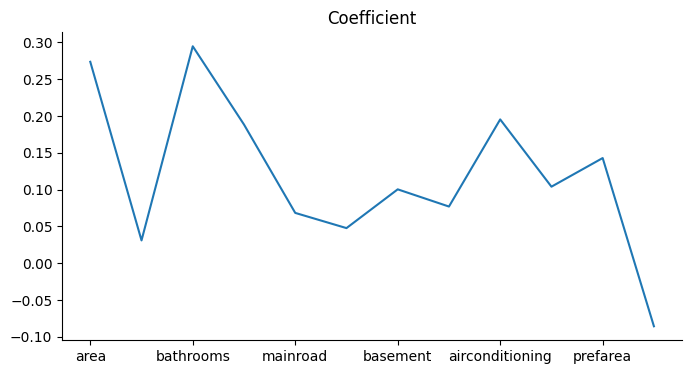

In [ ]:
from matplotlib import pyplot as plt
coef_df['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

# ***Final Evaluation***

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.52
Mean Squared Error (MSE): 0.51
Root Mean Squared Error (RMSE): 0.71
R-squared (R2): 0.65


# ***Residuals plot***

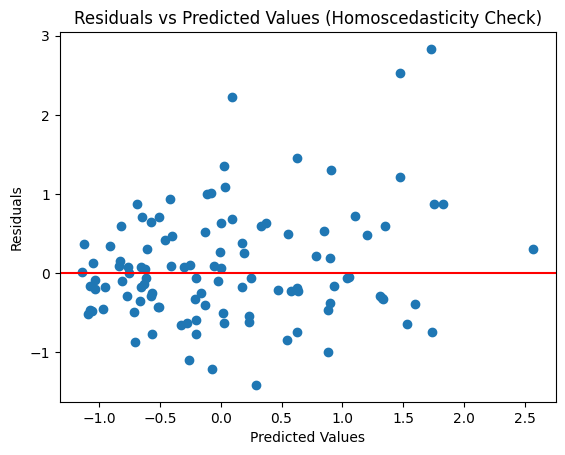

In [ ]:
error = y_test - y_pred
plt.scatter(y_pred, error)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

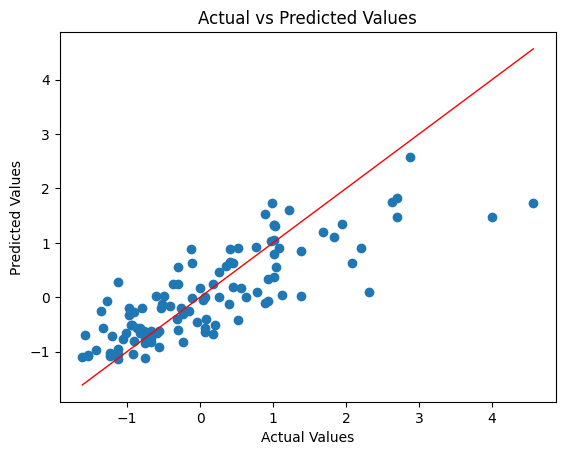

In [ ]:
plt.scatter(x=y_test,y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=1,color='r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()